In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import boxcox

In [2]:
# Load data
file_path = "Data/OnlineNewsPopularity.csv" # Please leave the csv file in Data folder of the workspace or change file_path,
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

In [3]:
# Display dataset information
print("Dataset Information:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords             

In [4]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("\nMissing Values:")
    print(missing_values)
else:
    print("\nNo missing values found in the dataset.")


No missing values found in the dataset.


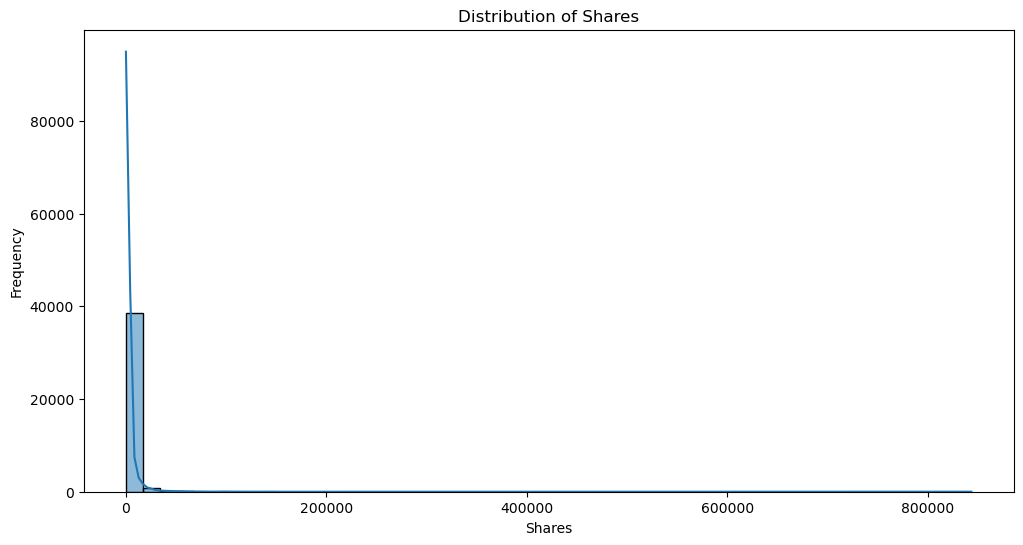

In [6]:
# Visualize the distribution of the target variable 'shares'
plt.figure(figsize=(12, 6))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()


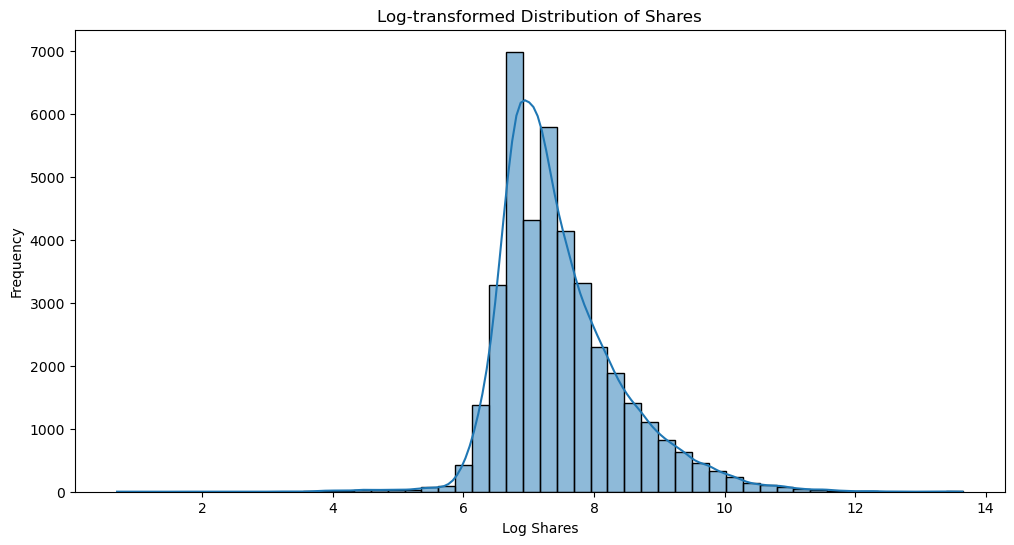

In [7]:
# Log-transform the 'shares' column to handle skewness
df['log_shares'] = np.log1p(df['shares'])
plt.figure(figsize=(12, 6))
sns.histplot(df['log_shares'], bins=50, kde=True)
plt.title("Log-transformed Distribution of Shares")
plt.xlabel("Log Shares")
plt.ylabel("Frequency")
plt.show()

Optimal lambda for Box-Cox: -0.21964795585426122


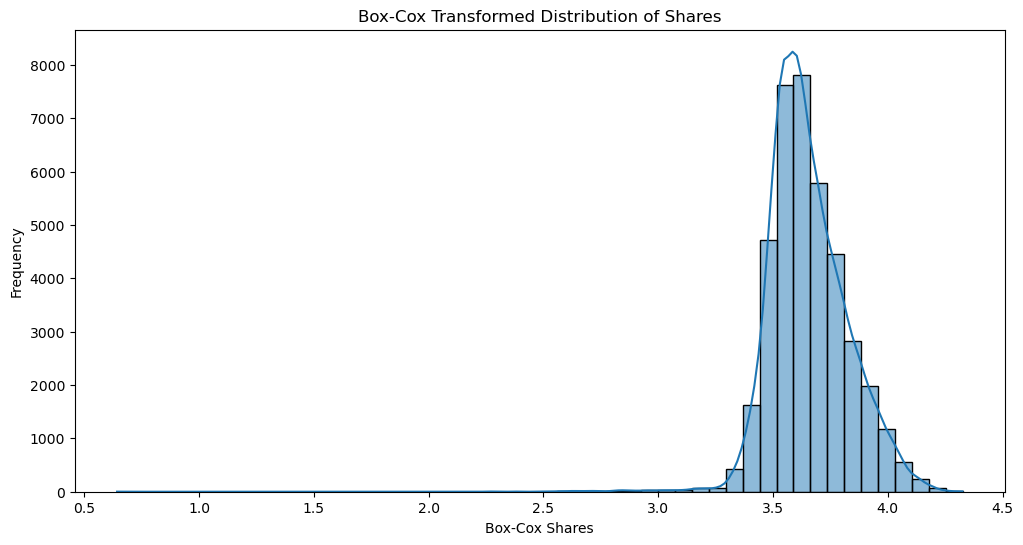

In [8]:
# Apply Box-Cox transformation to further normalize the distribution
df['boxcox_shares'], lambda_val = boxcox(df['shares'] + 1)  # Adding 1 to handle zero values
print(f"Optimal lambda for Box-Cox: {lambda_val}")
plt.figure(figsize=(12, 6))
sns.histplot(df['boxcox_shares'], bins=50, kde=True)
plt.title("Box-Cox Transformed Distribution of Shares")
plt.xlabel("Box-Cox Shares")
plt.ylabel("Frequency")
plt.show()

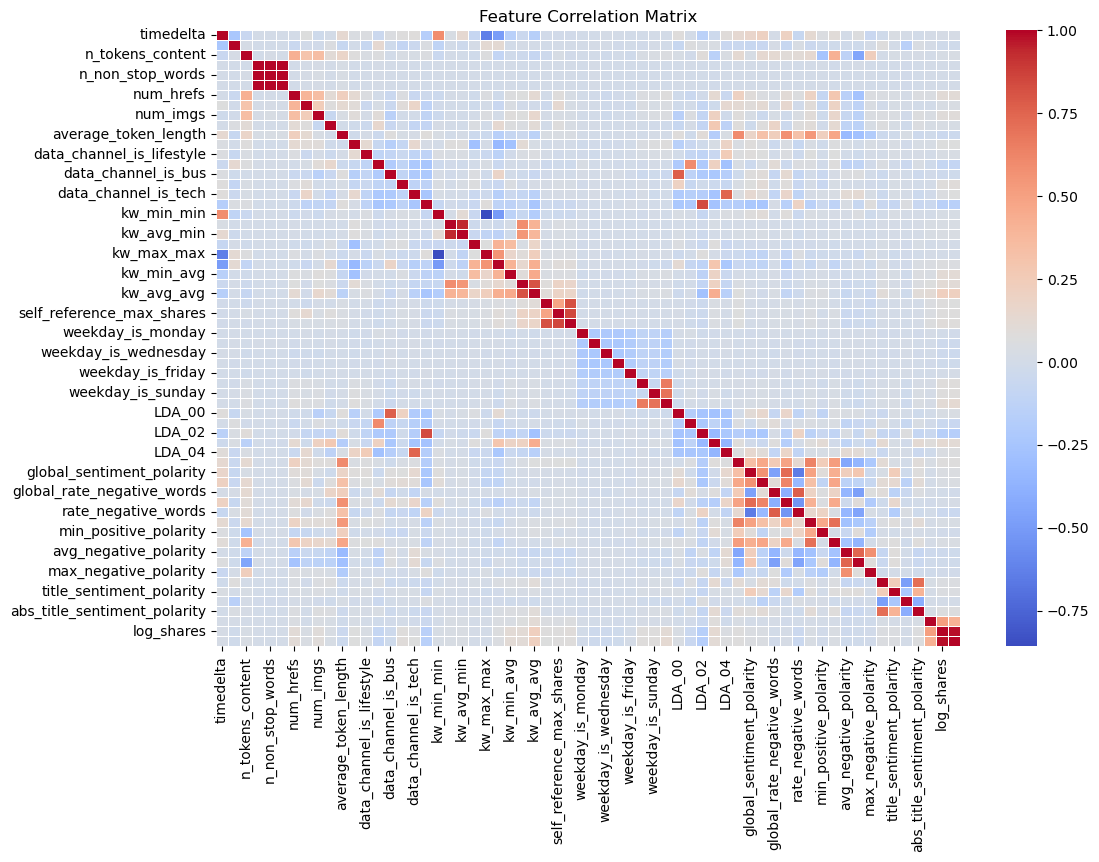

In [9]:
# Compute and visualize correlation matrix using only numerical columns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [10]:
# Identify the most correlated feature pairs
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
print("Top correlated feature pairs:")
print(high_corr_pairs[high_corr_pairs < 1].head(10))


Top correlated feature pairs:
n_non_stop_unique_tokens  n_unique_tokens             0.999852
n_unique_tokens           n_non_stop_unique_tokens    0.999852
n_non_stop_words          n_unique_tokens             0.999572
n_unique_tokens           n_non_stop_words            0.999572
n_non_stop_unique_tokens  n_non_stop_words            0.999532
n_non_stop_words          n_non_stop_unique_tokens    0.999532
log_shares                boxcox_shares               0.981244
boxcox_shares             log_shares                  0.981244
kw_max_min                kw_avg_min                  0.940529
kw_avg_min                kw_max_min                  0.940529
dtype: float64


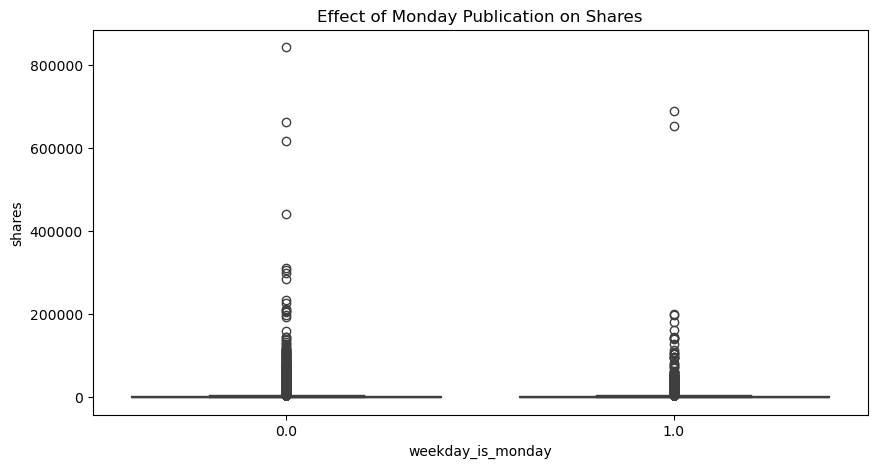

In [11]:
# Analyze effect of weekdays on shares
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday_is_monday', y='shares', data=df)
plt.title("Effect of Monday Publication on Shares")
plt.show()

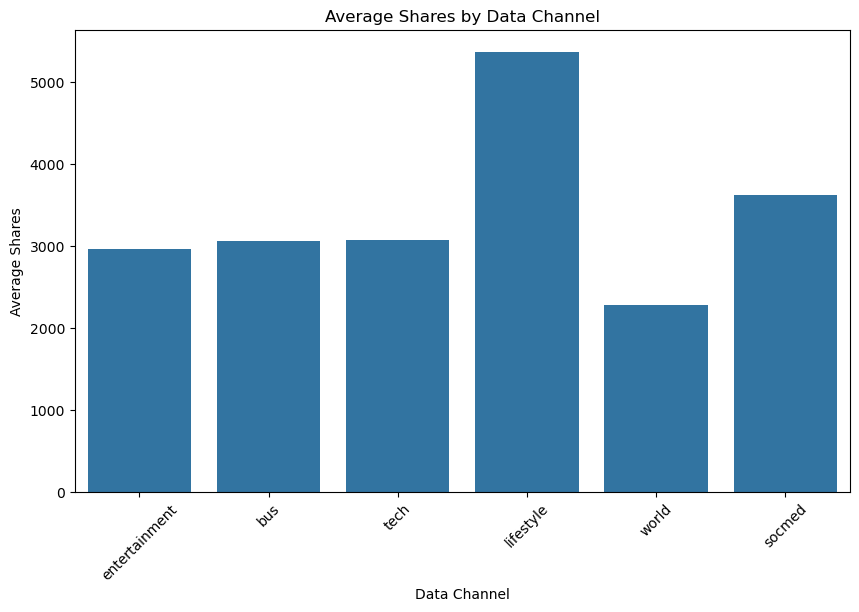

In [12]:
# Effect of data channel on shares
channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
            'data_channel_is_bus', 'data_channel_is_socmed', 
            'data_channel_is_tech', 'data_channel_is_world']

df['data_channel'] = df[channels].idxmax(axis=1)
df['data_channel'] = df['data_channel'].str.replace('data_channel_is_', '')

plt.figure(figsize=(10, 6))
sns.barplot(x=df['data_channel'], y=df['shares'], estimator=np.mean, errorbar=None)
plt.title("Average Shares by Data Channel")
plt.xlabel("Data Channel")
plt.ylabel("Average Shares")
plt.xticks(rotation=45)
plt.show()

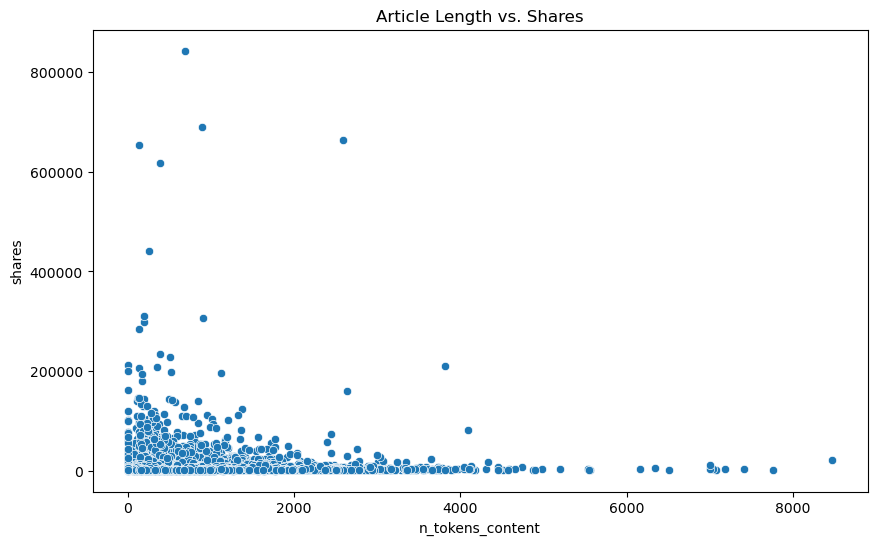

In [13]:
# Scatterplot to visualize the relationship between article length and shares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_tokens_content', y='shares', data=df)
plt.title("Article Length vs. Shares")
plt.show()


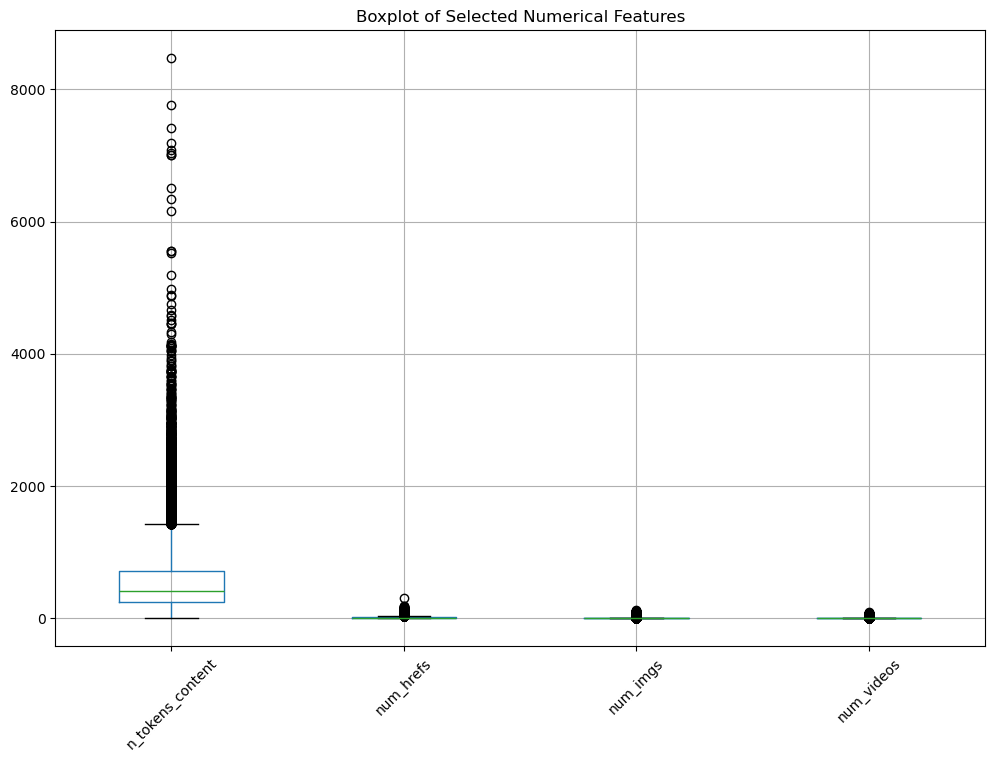

In [14]:
# Boxplot for selected numerical features
numerical_features = ['n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']
plt.figure(figsize=(12, 8))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Numerical Features")
plt.show()

In [15]:
# Detect outliers using the IQR method
Q1 = df['shares'].quantile(0.25)
Q3 = df['shares'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['shares'] < (Q1 - 1.5 * IQR)) | (df['shares'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers using IQR: {len(outliers)}")



Number of outliers using IQR: 4541


In [16]:
# Detect outliers using Z-score
df['zscore'] = stats.zscore(df['shares'])
outliers_zscore = df[df['zscore'].abs() > 3]
print(f"Number of outliers using Z-score: {len(outliers_zscore)}")

Number of outliers using Z-score: 308


In [17]:
# Compute correlation between all variables and 'shares'
corr_with_shares = numeric_df.corr()['shares'].sort_values(ascending=False)
print(corr_with_shares.head(15))
print(corr_with_shares.tail(15))

shares                        1.000000
log_shares                    0.510181
boxcox_shares                 0.416169
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
kw_min_avg                    0.039551
num_imgs                      0.039388
global_subjectivity           0.031604
kw_avg_min                    0.030406
Name: shares, dtype: float64
rate_negative_words             -0.005183
weekday_is_tuesday              -0.007941
weekday_is_thursday             -0.008833
LDA_01                          -0.010183
data_channel_is_bus             -0.012376
rate_positive_words             -0.013241
data_channel_is_tech            -0.013253
LDA_04                          -0.016622
data_channel_is_entertainment   -0.017006
min_nega

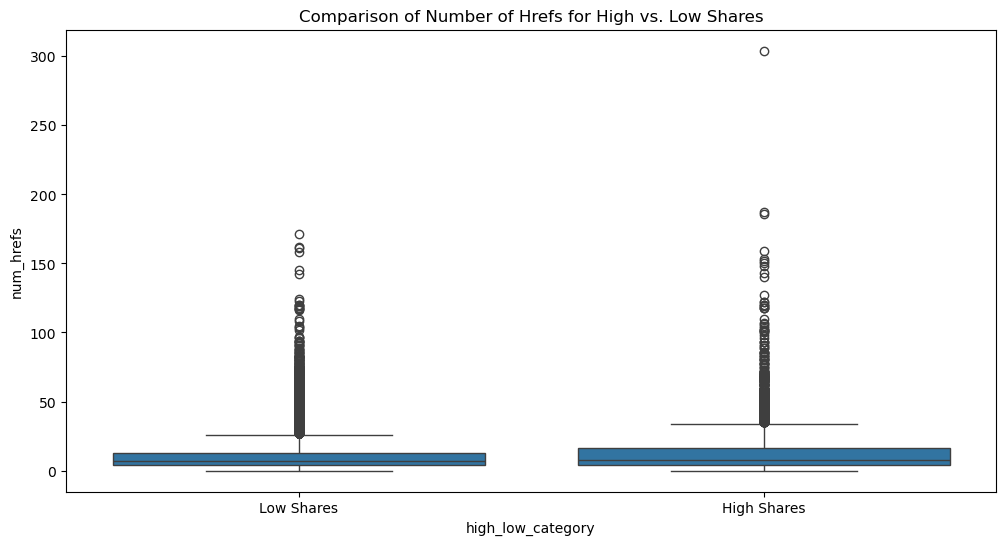

In [18]:
# High vs. Low shares comparison
threshold_high = df['shares'].quantile(0.75)
threshold_low = df['shares'].quantile(0.25)

df['high_low_category'] = np.where(df['shares'] > threshold_high, 'High Shares', 'Low Shares')

plt.figure(figsize=(12, 6))
sns.boxplot(x='high_low_category', y='num_hrefs', data=df)
plt.title("Comparison of Number of Hrefs for High vs. Low Shares")
plt.show()

In [19]:
# Ensure 'shares_category' column exists for grouping
q1 = df['shares'].quantile(0.25)  # First quartile
q2 = df['shares'].quantile(0.5)   # Median
q3 = df['shares'].quantile(0.75)  # Third quartile

# Create categorical variable for shares
df['shares_category'] = pd.cut(df['shares'], 
                               bins=[0, q1, q2, q3, df['shares'].max()], 
                               labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Verify creation of 'shares_category'
print(df['shares_category'].value_counts())  # Check distribution of categories

shares_category
Medium-Low     10152
Medium-High     9932
Low             9930
High            9630
Name: count, dtype: int64


C:\Users\Hongyu\AppData\Local\Temp\ipykernel_34944\40519870.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shares_category')[selected_features].mean().plot(kind='bar', ax=axes[0])
C:\Users\Hongyu\AppData\Local\Temp\ipykernel_34944\40519870.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shares_category')['log_shares'].mean().plot(kind='bar', ax=axes[1], color='green')


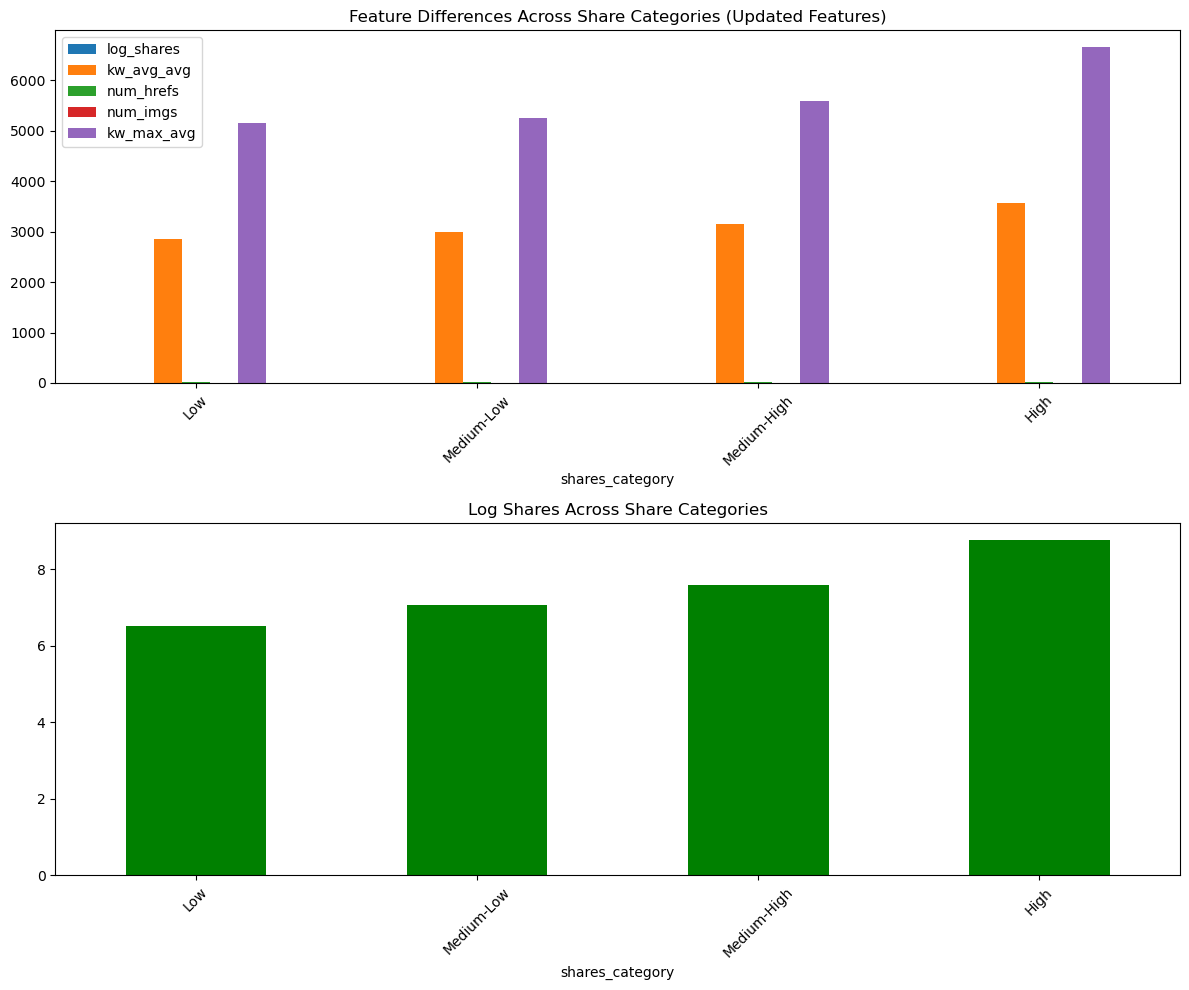

In [20]:
# Visualizing feature differences across share categories using subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Select features based on correlation analysis
selected_features = ['log_shares', 'kw_avg_avg', 'num_hrefs', 'num_imgs', 'kw_max_avg']

# Plot bar chart for selected features across share categories
df.groupby('shares_category')[selected_features].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Feature Differences Across Share Categories (Updated Features)")
axes[0].tick_params(axis='x', rotation=45)

# Plot mean log_shares across categories separately
df.groupby('shares_category')['log_shares'].mean().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Log Shares Across Share Categories")
axes[1].tick_params(axis='x', rotation=45)

# Improve layout and display
plt.tight_layout()
plt.show()